In [1]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [45]:
typetags = ['PG'] #'PR', 'PG'
DATA_FOLDER = 'C:/Users/nzho773/OneDrive - The University of Auckland/Documents/MInfoTech/EmotiBitParsedData/'
participants = ['Lucia', 'Steven', 'Nick', 'LindsayDuring', 'LindsayAfter']

using PPG type: PG
Lucia's data processing fail
Steven's RMSSD is: 26443.324076887424
Nick's RMSSD is: 68926.63219748196
LindsayDuring's RMSSD is: nan
LindsayAfter's data processing fail



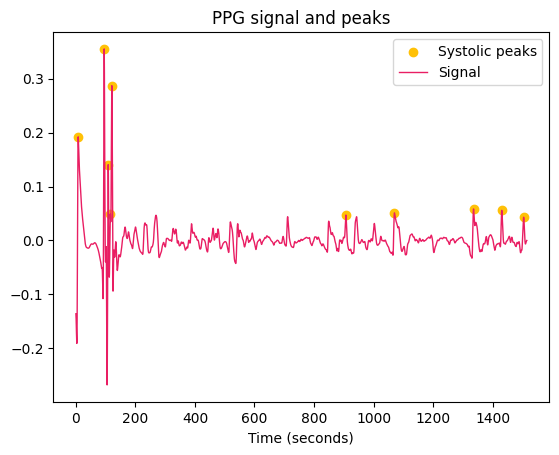

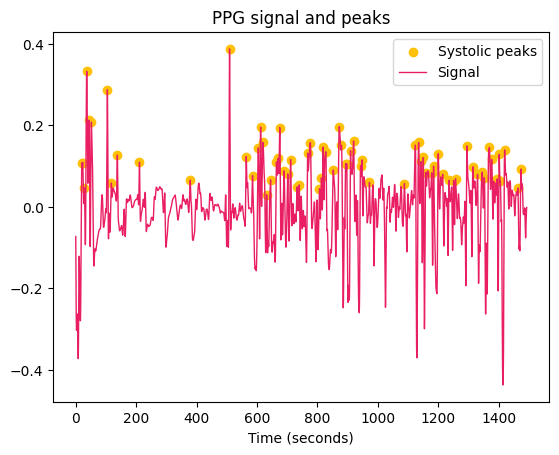

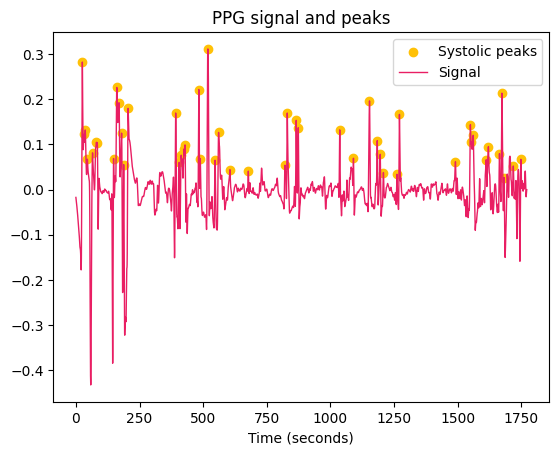

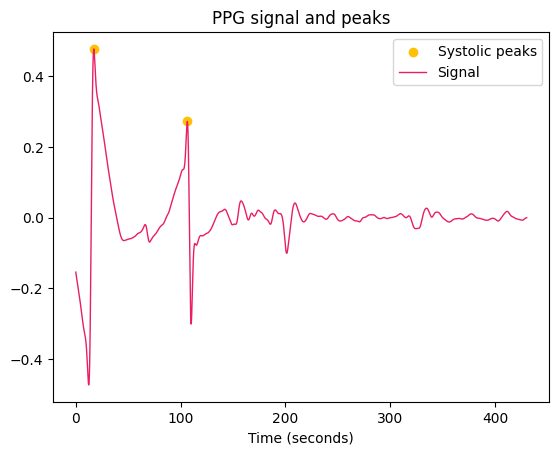

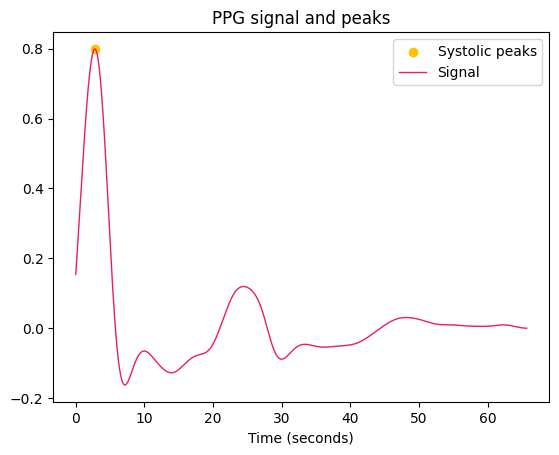

In [47]:
for typetag in typetags:
    print(f"using PPG type: {typetag}")
    for participant in participants: 
        folder_path = f"{DATA_FOLDER}{participant}"
        ppg = []
        all_files = []
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                all_files.append(os.path.join(root, file))

        for filename in all_files:
            if filename.endswith(f"_{typetag}.csv"):
                file_path = os.path.join(folder_path, filename)
                data = pd.read_csv(file_path, sep=',')
                toadd = data[typetag].to_numpy()
                ppg.append(toadd)
        
        combined_ppg = np.concatenate(ppg)

        
        try:
            peaks, info = nk.ppg_peaks(nk.ppg_clean(combined_ppg, method='elgendi'), sampling_rate=25, method="elgendi", show=True)
            hrv = nk.hrv_time(peaks, sampling_rate=25, show=False)
            print(f"{participant}'s RMSSD is: {hrv['HRV_RMSSD'].iloc[0]}")
        except Exception as e:
            print(f"{participant}'s data processing fail")
    print()

In [2]:
data = nk.data("bio_resting_5min_100hz")
data.head()  # Print first 5 rows

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669


In [7]:
# Find peaks
peaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,696.395349,62.135891,10.060728,60.275036,NaN,NaN,NaN,NaN,69.697983,69.779109,...,60.0,0.891502,660.0,740.0,14.651163,49.302326,470.0,1420.0,7.962963,234.375


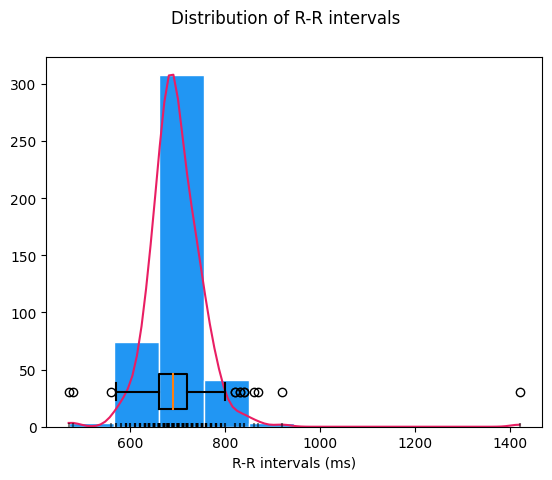

In [9]:
hrv_indices = nk.hrv_time(peaks, sampling_rate=100, show=True)
hrv_indices